 ## Vacunas y Sentimientos 
 ### Denis Lopez
 ### Wendy Hernandez 
 ### Jessica Roncancio 

😀😀😂🤣😃😄😅😆😉😊😋😎😍😘🥰😗😙😚😐😑😶🙄😏😣😥😮😛😜😝🤤😒🙁😲☹😖😞😟😤😧😦😭😢😨😩🤯😬😱😡😷🤒🤕🤢
                                                                                   
                                                                                        

## Objetivo 

https://www.youtube.com/watch?v=b7ard1O6DuU

## Se realiza Análisis de la Vacuna Sinovac

In [3]:

# Instalamos las librearias
import pandas as pd
import numpy as np
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
import re
import regex
import emoji
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
from IPython.display import Image

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
keys = pd.read_csv("C:/Users/usuario/Desktop/NLP/22_Febrero/llaves.csv", header=None)
keys = dict(zip(keys[0],keys[1])) #Convetir a diccionario 
keys.keys()


dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret', 'bearer_token'])

In [5]:
# Autenticar a través de la API 
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweets = tweepy.Cursor(api.search,
                       q=['Sinovac -RT'], 
                       lang='es', 
                       geocode='4.595718,-73.645620,220km',
                       tweet_mode='extended',
                       include_rts=False,
                       ).items(10000)



In [7]:
tweets ## convertir en objecto  interador a  normal es decir lista

In [8]:
# Objecto generador
t = [tweet for tweet in tweets]

In [9]:
t[0].full_text

'@JorgeGalindo Donde no sea por Sinovac quien sabe donde andaria Colombia. Los chinos nos salvaron.'

In [10]:
t[0].user.location

'Bogota'

In [11]:
t_processed = []

for tweet in t: 
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append('Bogotá')
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tweet.id}")
    
    t_processed.append(temp)

In [12]:
## mostralo bonito    
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'date', 'city', 'user_location', 'id', 'link']
data.head()

,tweets,date,city,user_location,id,link
0,@JorgeGalindo Donde no sea por Sinovac quien s...,2021-06-03 21:16:00,Bogotá,Bogota,1400561932550168578,https://twitter.com/i/web/stuatus/140056193255...
1,@Alejand73085487 @Fruizgomez @MinSaludCol @inf...,2021-06-03 21:02:50,Bogotá,"Bogotá, D.C., Colombia",1400558616852287499,https://twitter.com/i/web/stuatus/140055861685...
2,@Vicmunro @urnadecristal @infopresidencia @INS...,2021-06-03 20:56:56,Bogotá,Medellín,1400557134983610374,https://twitter.com/i/web/stuatus/140055713498...
3,@UniJaveriana @Laurabeta @PesquisaPUJ @javeria...,2021-06-03 20:18:27,Bogotá,"Bogotá, D.C., Colombia",1400547448389521408,https://twitter.com/i/web/stuatus/140054744838...
4,#SinMitos @MinSaludCol señaló que el 15 de jun...,2021-06-03 19:56:59,Bogotá,Colombia,1400542046566457345,https://twitter.com/i/web/stuatus/140054204656...


In [13]:
##Limpieza de datos


import re 

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

In [14]:
def text_clean(row):
    text = row['tweets']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
    
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag, "")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention, "")
        
    return text, links, hashtags, mentions
  

In [15]:
data[['texto_limpio', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data

,tweets,date,city,user_location,id,link,texto_limpio,links,hashtags,mentions
0,@JorgeGalindo Donde no sea por Sinovac quien s...,2021-06-03 21:16:00,Bogotá,Bogota,1400561932550168578,https://twitter.com/i/web/stuatus/140056193255...,Donde no sea por Sinovac quien sabe donde and...,[],[],[@JorgeGalindo]
1,@Alejand73085487 @Fruizgomez @MinSaludCol @inf...,2021-06-03 21:02:50,Bogotá,"Bogotá, D.C., Colombia",1400558616852287499,https://twitter.com/i/web/stuatus/140055861685...,"En USA usaron Pfizer, Moderna y Janssen; e...",[],[],"[@Alejand73085487, @Fruizgomez, @MinSaludCol, ..."
2,@Vicmunro @urnadecristal @infopresidencia @INS...,2021-06-03 20:56:56,Bogotá,Medellín,1400557134983610374,https://twitter.com/i/web/stuatus/140055713498...,"Pregunta, cuando llegan mas vacunas de Sin...",[],[],"[@Vicmunro, @urnadecristal, @infopresidencia, ..."
3,@UniJaveriana @Laurabeta @PesquisaPUJ @javeria...,2021-06-03 20:18:27,Bogotá,"Bogotá, D.C., Colombia",1400547448389521408,https://twitter.com/i/web/stuatus/140054744838...,puedo aplicarme la vacuna sinovac y la Pf...,[],[#SinMitos],"[@UniJaveriana, @Laurabeta, @PesquisaPUJ, @jav..."
4,#SinMitos @MinSaludCol señaló que el 15 de jun...,2021-06-03 19:56:59,Bogotá,Colombia,1400542046566457345,https://twitter.com/i/web/stuatus/140054204656...,señaló que el 15 de junio se dará apertura a...,[],[#SinMitos],[@MinSaludCol]
...,...,...,...,...,...,...,...,...,...,...
485,@MiyerTorresA @redsaludnorte @wirodriguezs @Jo...,2021-05-26 21:46:23,Bogotá,Cali,1397670474965041157,https://twitter.com/i/web/stuatus/139767047496...,"Buenas tardes, Podría por favor info...",[],[],"[@MiyerTorresA, @redsaludnorte, @wirodriguezs,..."
486,Vacunas (PFIZER Y SINOVAC) se aplicaran desde ...,2021-05-26 21:37:55,Bogotá,"Manizales, Caldas. Colombia",1397668346972327936,https://twitter.com/i/web/stuatus/139766834697...,Vacunas (PFIZER Y SINOVAC) se aplicaran desde ...,[https://t.co/vNr25RM64T],[],[]
487,@MinSaludCol Porqué en Colombia se está aplica...,2021-05-26 21:07:50,Bogotá,COLOMBIA,1397660775406309376,https://twitter.com/i/web/stuatus/139766077540...,Porqué en Colombia se está aplicando la vacun...,[],[],[@MinSaludCol]
488,Porqué si aún la OMS no ha aprobado el uso de ...,2021-05-26 20:56:05,Bogotá,COLOMBIA,1397657815766941702,https://twitter.com/i/web/stuatus/139765781576...,Porqué si aún la OMS no ha aprobado el uso de ...,[],[],[]


In [16]:
def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)

    return emoji_list

In [17]:
data['emojis'] = data['texto_limpio'].apply(lambda text: get_emojis(text))
data.head()

,tweets,date,city,user_location,id,link,texto_limpio,links,hashtags,mentions,emojis
0,@JorgeGalindo Donde no sea por Sinovac quien s...,2021-06-03 21:16:00,Bogotá,Bogota,1400561932550168578,https://twitter.com/i/web/stuatus/140056193255...,Donde no sea por Sinovac quien sabe donde and...,[],[],[@JorgeGalindo],[]
1,@Alejand73085487 @Fruizgomez @MinSaludCol @inf...,2021-06-03 21:02:50,Bogotá,"Bogotá, D.C., Colombia",1400558616852287499,https://twitter.com/i/web/stuatus/140055861685...,"En USA usaron Pfizer, Moderna y Janssen; e...",[],[],"[@Alejand73085487, @Fruizgomez, @MinSaludCol, ...",[]
2,@Vicmunro @urnadecristal @infopresidencia @INS...,2021-06-03 20:56:56,Bogotá,Medellín,1400557134983610374,https://twitter.com/i/web/stuatus/140055713498...,"Pregunta, cuando llegan mas vacunas de Sin...",[],[],"[@Vicmunro, @urnadecristal, @infopresidencia, ...",[]
3,@UniJaveriana @Laurabeta @PesquisaPUJ @javeria...,2021-06-03 20:18:27,Bogotá,"Bogotá, D.C., Colombia",1400547448389521408,https://twitter.com/i/web/stuatus/140054744838...,puedo aplicarme la vacuna sinovac y la Pf...,[],[#SinMitos],"[@UniJaveriana, @Laurabeta, @PesquisaPUJ, @jav...",[]
4,#SinMitos @MinSaludCol señaló que el 15 de jun...,2021-06-03 19:56:59,Bogotá,Colombia,1400542046566457345,https://twitter.com/i/web/stuatus/140054204656...,señaló que el 15 de junio se dará apertura a...,[],[#SinMitos],[@MinSaludCol],[]


## Análisis de Sentimiento y Polaridad 

In [18]:
datae = data[['tweets', 'emojis']]
datae.head()

,tweets,emojis
0,@JorgeGalindo Donde no sea por Sinovac quien s...,[]
1,@Alejand73085487 @Fruizgomez @MinSaludCol @inf...,[]
2,@Vicmunro @urnadecristal @infopresidencia @INS...,[]
3,@UniJaveriana @Laurabeta @PesquisaPUJ @javeria...,[]
4,#SinMitos @MinSaludCol señaló que el 15 de jun...,[]


In [19]:
data['puntaje_sent']=data['texto_limpio'].apply(lambda x: vader.polarity_scores(x)['compound'])
data[['texto_limpio','puntaje_sent', 'emojis']]

,texto_limpio,puntaje_sent,emojis
0,Donde no sea por Sinovac quien sabe donde and...,-0.2960,[]
1,"En USA usaron Pfizer, Moderna y Janssen; e...",-0.2960,[]
2,"Pregunta, cuando llegan mas vacunas de Sin...",0.0000,[]
3,puedo aplicarme la vacuna sinovac y la Pf...,0.0000,[]
4,señaló que el 15 de junio se dará apertura a...,0.0000,[]
...,...,...,...
485,"Buenas tardes, Podría por favor info...",0.5191,[]
486,Vacunas (PFIZER Y SINOVAC) se aplicaran desde ...,0.0000,[]
487,Porqué en Colombia se está aplicando la vacun...,-0.2960,[]
488,Porqué si aún la OMS no ha aprobado el uso de ...,0.2556,[]


In [20]:
data['puntaje']=data['texto_limpio'].apply(lambda x: vader.polarity_scores(x)['compound'])
data[['texto_limpio','puntaje']]


,texto_limpio,puntaje
0,Donde no sea por Sinovac quien sabe donde and...,-0.2960
1,"En USA usaron Pfizer, Moderna y Janssen; e...",-0.2960
2,"Pregunta, cuando llegan mas vacunas de Sin...",0.0000
3,puedo aplicarme la vacuna sinovac y la Pf...,0.0000
4,señaló que el 15 de junio se dará apertura a...,0.0000
...,...,...
485,"Buenas tardes, Podría por favor info...",0.5191
486,Vacunas (PFIZER Y SINOVAC) se aplicaran desde ...,0.0000
487,Porqué en Colombia se está aplicando la vacun...,-0.2960
488,Porqué si aún la OMS no ha aprobado el uso de ...,0.2556


## Tweet  (SINOVAC)

In [21]:
def pre_procesado(texto):
    if texto > 0:
        senti = 'POSITIVE'
        #return senti
    if texto < 0:
        senti = 'NEGATIVE' 
        #return senti
    if texto == 0:
        senti = 'NEUTRO' 
    return senti

data['tipo_sent'] = data['puntaje_sent'].apply(lambda texto: pre_procesado(texto))
#data



In [22]:
Cant_Tipo = pd.DataFrame(data.tipo_sent.value_counts()).reset_index()
Cant_Tipo.columns = ['tipo_sent', 'cnt']
Cant_Tipo = Cant_Tipo.sort_values('cnt')
Cant_Tipo

,tipo_sent,cnt
2,POSITIVE,50
1,NEGATIVE,125
0,NEUTRO,315


## Ejemplo de Tweet

In [23]:
data[['texto_limpio','puntaje']].max()

texto_limpio    🚨 La vacunación de privados comenzaría el 15 d...
puntaje                                                    0.8402
dtype: object

In [24]:
data[['texto_limpio','puntaje']].min()

texto_limpio    \n\nUna ciudad ubicada en Sao Paulo, Brasil, i...
puntaje                                                   -0.8957
dtype: object

## Tweet más negativos  (SINOVAC)

In [26]:
data[['texto_limpio','puntaje_sent','emojis']].sort_values('puntaje_sent',ascending=True)

,texto_limpio,puntaje_sent,emojis
340,Le entiendo. La semana pasada una conocida m...,-0.8957,"[😭, 😭]"
352,Yo no acabo de entender Una persona cercana d...,-0.8807,"[😟, 😟, 😟]"
137,No hay ni para el personal de salud ? No hay ...,-0.8738,[]
14,"ABSOLUTAMENTE sin duda alguna, a mi Sinovac y...",-0.8692,[]
345,Pero que necesidaaaaa de decir que Sinovac e...,-0.8689,"[😭, 😭]"
...,...,...,...
337,La vacuna me ocasiono 2 dias de mucho sueño ca...,0.7351,"[🤭, 💉, 😎]"
178,La vacuna de Sinovac es excelente! \nA los adu...,0.8122,[]
321,"Excelente. Mi papá 71, Sinovac dos dosis...",0.8213,"[🙂, 👌, ⭐, ⭐, ⭐, ⭐, ⭐]"
426,Vacunaron a mis papás (sinovac) ☺️☺️☺️,0.8402,"[☺️, ☺️, ☺️]"


In [27]:
t[340].full_text

'@ConsueCorrales @davidbautistaqf Le entiendo. La semana pasada una conocida me dijo que no se iba a vacunar porque no era Pfizer sino Astra Zéneca y Sinovac las disponibles😭 la peor vacuna es la que no se pone, yo queriéndome vacunar yaaaaaa😭'

## Tweet más positivos   (SINOVAC)

In [28]:

data[['texto_limpio','puntaje_sent','emojis']].sort_values('puntaje_sent',ascending=False)

,texto_limpio,puntaje_sent,emojis
378,Ayer fue jornada de vacunación masiva en Colom...,0.8402,"[😁, 😁, 😁]"
426,Vacunaron a mis papás (sinovac) ☺️☺️☺️,0.8402,"[☺️, ☺️, ☺️]"
321,"Excelente. Mi papá 71, Sinovac dos dosis...",0.8213,"[🙂, 👌, ⭐, ⭐, ⭐, ⭐, ⭐]"
178,La vacuna de Sinovac es excelente! \nA los adu...,0.8122,[]
337,La vacuna me ocasiono 2 dias de mucho sueño ca...,0.7351,"[🤭, 💉, 😎]"
...,...,...,...
345,Pero que necesidaaaaa de decir que Sinovac e...,-0.8689,"[😭, 😭]"
14,"ABSOLUTAMENTE sin duda alguna, a mi Sinovac y...",-0.8692,[]
137,No hay ni para el personal de salud ? No hay ...,-0.8738,[]
352,Yo no acabo de entender Una persona cercana d...,-0.8807,"[😟, 😟, 😟]"


In [29]:
t[378].full_text

'Ayer fue jornada de vacunación masiva en Colombia, hice fila con mamá 4 horas esperando por la vacuna para ella.\n\nLes cuento que le aplicaron la #Sinovac y ya está agendada para la segunda dosis. Que alegría tan hpta.😁😁😁'

## Visualizaciones 😊

In [33]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [35]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
1,💉,30
10,➡️,17
31,👉,8
42,✅,6
47,😭,5


In [36]:
trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])
layout = go.Layout(title='Emojis más usados')

In [37]:
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [38]:
# Importamos las librerias
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords

stopwords = stopwords.words('spanish')

In [45]:
#PROYECTAR
#limpieza del texto
import re 

# stopwords.append("https")
# stopwords.append("co")

stopwords.extend(["Covid", "covid", "Pfizer", "Vacuna", "sinovac", "vacunas", "colombia", "vacuna", "pfizer"])#quitar palabras muy repetidas

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.texto_limpio.apply(lambda texto: pre_procesado(texto))

data.head()

,tweets,date,city,user_location,id,link,texto_limpio,links,hashtags,mentions,emojis,puntaje_sent,puntaje,tipo_sent,pp
0,#HablemosDeVacunas @UniJaveriana Sinovac es un...,2021-06-03 16:45:14,Bogotá,"Medellín, Colombia",1400493791233069059,https://twitter.com/i/web/stuatus/140049379123...,"Sinovac es una vacuna de Virus inactivado, s...","[https://t.co/WHQKeAZRba, https://t.co/1tTPBSV...","[#HablemosDeVacunas, #COVID19]","[@UniJaveriana, @MinSaludCol]","[👌, 💉, 💉, 😷, 🦠]",0.4466,0.4466,POSITIVE,virus inactivado segura efectiva plan luego co...
1,"@marcela_gallego A mi hermano, a colegas conoc...",2021-06-03 16:42:54,Bogotá,Bogotá,1400493203292311563,https://twitter.com/i/web/stuatus/140049320329...,"A mi hermano, a colegas conocidos y a mi nos ...",[],[],[@marcela_gallego],[🙏🏼],0.0000,0.0000,NEUTRO,hermano colegas conocidos aplicaron allá dolor...
2,@drhuerta Que riesgos pueden haber al vacunars...,2021-06-03 16:42:00,Bogotá,Bogotá,1400492979555536899,https://twitter.com/i/web/stuatus/140049297955...,Que riesgos pueden haber al vacunarse dos vec...,[],[],[@drhuerta],[],0.0000,0.0000,NEUTRO,riesgos pueden haber vacunarse dos veces dos d...
3,@PesquisaPUJ ¿Hay alguna resolución o norma do...,2021-06-03 16:33:59,Bogotá,"Bogotá, D.C., Colombia",1400490961239789568,https://twitter.com/i/web/stuatus/140049096123...,¿Hay alguna resolución o norma donde se forma...,[],[#SinMitos],"[@PesquisaPUJ, @ELTIEMPO, @UniJaveriana, @MinS...",[],0.0000,0.0000,NEUTRO,alguna resolución norma formalice decisión alg...
4,@marcela_gallego Previo covid positivo y Dos d...,2021-06-03 16:31:33,Bogotá,"Bogota, Colombia",1400490346073804804,https://twitter.com/i/web/stuatus/140049034607...,Previo covid positivo y Dos dosis de pfizer t...,[],[#Vacunate],[@marcela_gallego],[],0.0258,0.0258,POSITIVE,previo positivo dos dosis súper bien contacto ...


In [46]:
Nube_Colombia= PIL.Image.open("C:/Users/usuario/Desktop/NLP/22_Febrero/Colombia_1.png")


In [47]:
mask = np.array(Nube_Colombia)

In [48]:
P = data.loc[:, 'puntaje_sent'] > 0
df_p = data.loc[P]

In [49]:
palabras = data.texto_limpio.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color="white", colormap='inferno',
                      stopwords=stopwords,
                      mask=mask, contour_width=4, contour_color='black').generate(palabras) 



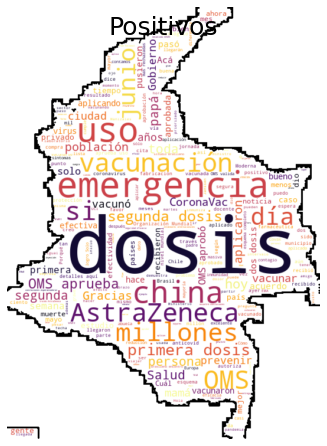

In [50]:
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.suptitle('Positivos',fontsize=25)
plt.show()


In [51]:
Nube_Colombia_1= PIL.Image.open("C:/Users/usuario/Desktop/NLP/22_Febrero/Colombia_1.png")

In [52]:
mask_1 = np.array(Nube_Colombia_1)

In [53]:
P2 = data.loc[:, 'puntaje_sent'] < 0
df_p2 = data.loc[P2]

In [54]:
palabras2 = data.texto_limpio.str.cat(sep=" ")
wordcloud2 = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color="white", colormap='inferno',
                      stopwords=stopwords,
                      mask=mask, contour_width=4, contour_color='black').generate(palabras) 


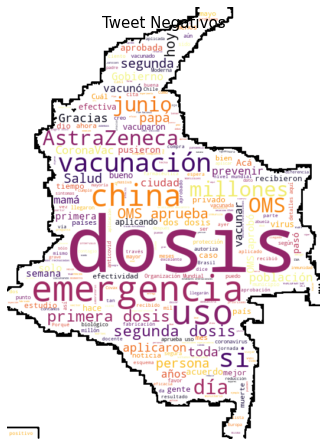

In [59]:
plt.figure(figsize=(6,6))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.suptitle('Tweet Negativos',fontsize=15) 
plt.show()